In [12]:
import pandas as pd

# Load the datasets
customers = pd.read_csv(r"C:\Users\sajal\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\sajal\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\sajal\Downloads\Transactions.csv")

# Display the first few rows of each dataset to understand their structure
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

(customers_head, products_head, transactions_head, customers_info, products_info, transactions_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [14]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Check for missing values
missing_values = {
    "Customers": customers.isnull().sum(),
    "Products": products.isnull().sum(),
    "Transactions": transactions.isnull().sum()
}

# Check for duplicates
duplicates = {
    "Customers": customers.duplicated().sum(),
    "Products": products.duplicated().sum(),
    "Transactions": transactions.duplicated().sum()
}

# Summary of the cleaned data
data_summary = {
    "Customers": customers.describe(include='all'),
    "Products": products.describe(include='all'),
    "Transactions": transactions.describe(include='all')
}

(missing_values, duplicates, data_summary)


({'Customers': CustomerID      0
  CustomerName    0
  Region          0
  SignupDate      0
  dtype: int64,
  'Products': ProductID      0
  ProductName    0
  Category       0
  Price          0
  dtype: int64,
  'Transactions': TransactionID      0
  CustomerID         0
  ProductID          0
  TransactionDate    0
  Quantity           0
  TotalValue         0
  Price              0
  dtype: int64},
 {'Customers': 0, 'Products': 0, 'Transactions': 0},
 {'Customers':        CustomerID      CustomerName         Region           SignupDate
  count         200               200            200                  200
  unique        200               200              4                  NaN
  top         C0001  Lawrence Carroll  South America                  NaN
  freq            1                 1             59                  NaN
  mean          NaN               NaN            NaN  2023-07-19 08:31:12
  min           NaN               NaN            NaN  2022-01-22 00:00:00
  25%    

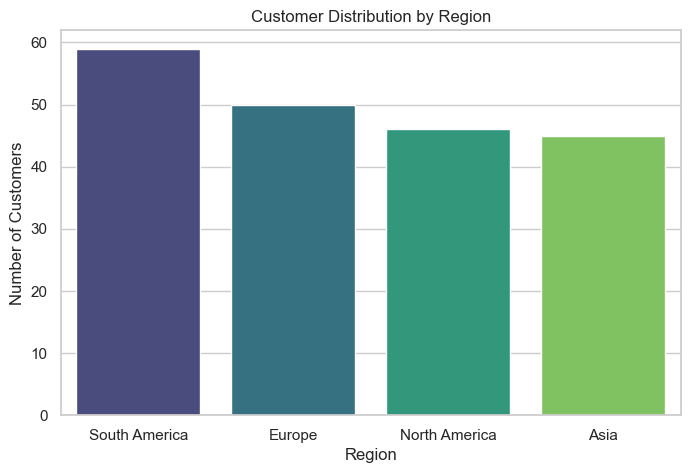

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualizations
sns.set_theme(style="whitegrid")

# 1. Distribution of customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis", hue=region_counts.index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()




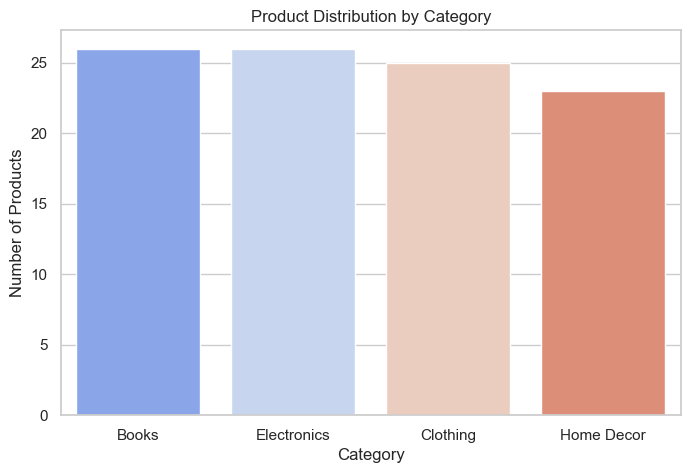

In [34]:
# 2. Product categories by count
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm",hue=category_counts.index)
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

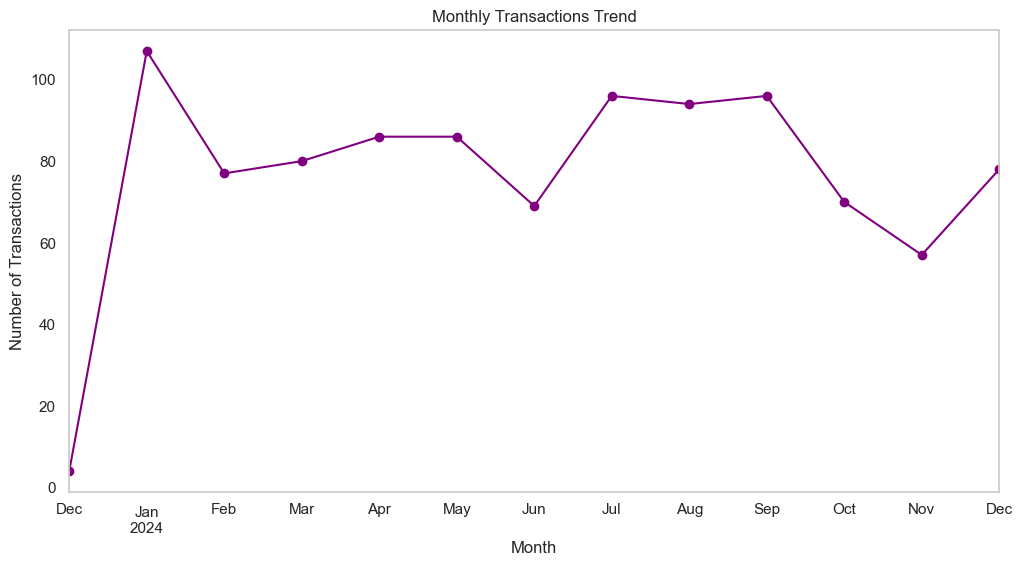

In [36]:
# 3. Monthly transactions trend
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('TransactionMonth').size()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

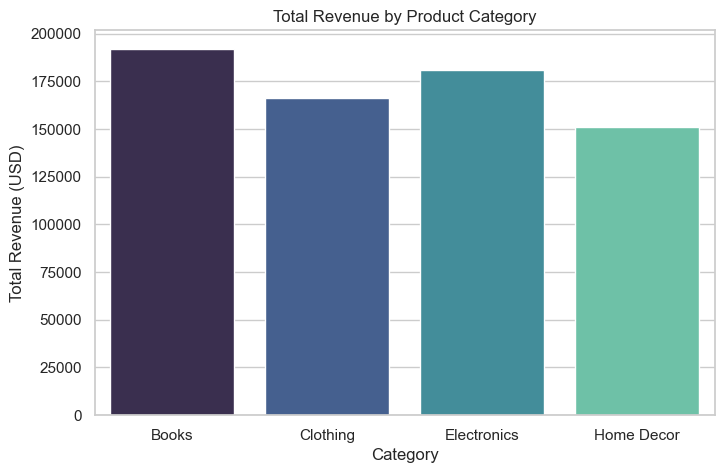

In [38]:
# 4. Total revenue by product category
transactions_products = transactions.merge(products, on="ProductID", how="left")
revenue_by_category = transactions_products.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="mako",hue=revenue_by_category.index)
plt.title("Total Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()

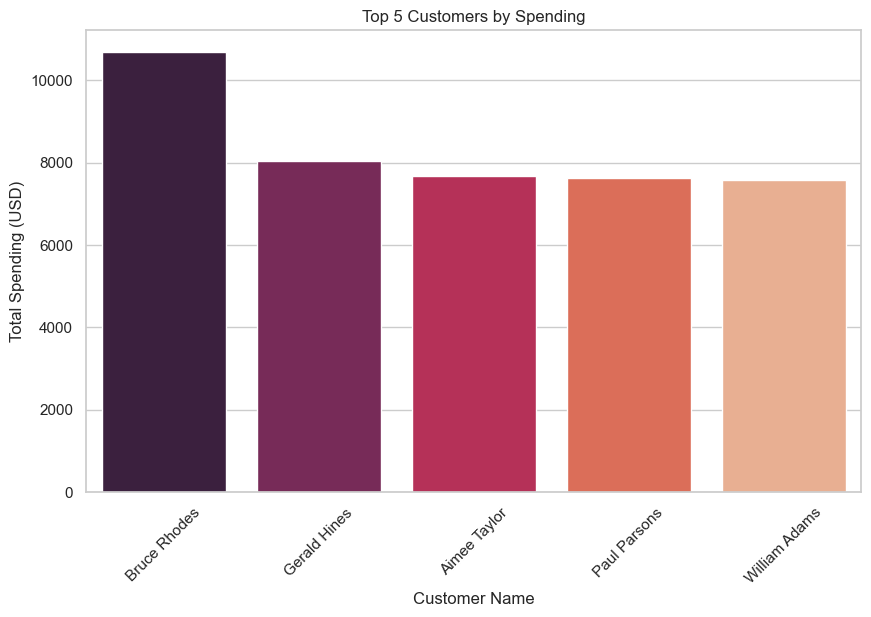

In [40]:
# 5. Top 5 customers by total spending
spending_by_customer = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
top_customers = customers[customers['CustomerID'].isin(spending_by_customer.index)]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers['CustomerName'], y=spending_by_customer.values, palette="rocket",hue=top_customers['CustomerName'])
plt.title("Top 5 Customers by Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)
plt.show()